In [362]:
import pandas as pd                                # to work with dataframes
import numpy as np                                 # to work with numpy arrays
import nltk                                        # working with nlp algorithms
from nltk.sentiment import SentimentIntensityAnalyzer  # To predict the sentiments based on the text
from tqdm.notebook import tqdm                     # library for adding progress bar
import matplotlib.pyplot as plt                     # Visualization tool
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import statistics
from statistics import mode
import warnings
warnings.filterwarnings('ignore')                  # To ignore the warnings

In [363]:
df1 = pd.read_csv("C:/Users/leena/OneDrive/Documents/Leena/archive/2-wheeler-EV-bikewale.csv")

In [364]:
df1.head()

review    Used it for  \
0  We all checked the bike's capacity to be 150 k...  Daily Commute   
1  Performance is very poor on this bike. The cha...     Everything   
2  I purchased this in April 2022 and the sales s...  Daily Commute   
3  If any issues come in scooty parts not availab...  Daily Commute   
4  Don't buy this vehicle unless you have a near ...  Daily Commute   

       Owned for      Ridden for  rating  Visual Appeal  Reliability  \
0    Never owned             NaN       1            3.0          4.0   
1         > 1 yr      < 5000 kms       1            3.0          1.0   
2     < 3 months      < 5000 kms       3            4.0          4.0   
3  6 months-1 yr  5000-10000 kms       1            1.0          1.0   
4  6 months-1 yr      < 5000 kms       1            3.0          4.0   

   Performance  Service Experience  Extra Features  Comfort  Maintenance cost  \
0          NaN                 NaN             NaN      4.0               NaN   
1          NaN                 1.0             NaN      3.0               NaN   
2          NaN                 2.0             NaN      5.0               NaN   
3          NaN                 1.0             NaN      1.0               NaN   
4          NaN                 1.0             NaN      3.0               NaN   

   Value for Money Model Name  
0              1.0  TVS iQube  
1              3.0  TVS iQube  
2              2.0  TVS iQube  
3              1.0  TVS iQube  
4              2.0  TVS iQube

In [365]:
df1.shape

(844, 14)

In [366]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              797 non-null    object 
 1   Used it for         844 non-null    object 
 2   Owned for           844 non-null    object 
 3   Ridden for          668 non-null    object 
 4   rating              844 non-null    int64  
 5   Visual Appeal       739 non-null    float64
 6   Reliability         716 non-null    float64
 7   Performance         345 non-null    float64
 8   Service Experience  703 non-null    float64
 9   Extra Features      185 non-null    float64
 10  Comfort             530 non-null    float64
 11  Maintenance cost    180 non-null    float64
 12  Value for Money     390 non-null    float64
 13  Model Name          844 non-null    object 
dtypes: float64(8), int64(1), object(5)
memory usage: 92.4+ KB


In [367]:
df1.describe()

rating  Visual Appeal  Reliability  Performance  \
count  844.000000     739.000000   716.000000   345.000000   
mean     3.363744       3.779432     3.314246     3.527536   
std      1.689873       1.350021     1.585024     1.507721   
min      1.000000       1.000000     1.000000     1.000000   
25%      1.000000       3.000000     2.000000     2.000000   
50%      4.000000       4.000000     4.000000     4.000000   
75%      5.000000       5.000000     5.000000     5.000000   
max      5.000000       5.000000     5.000000     5.000000   

       Service Experience  Extra Features     Comfort  Maintenance cost  \
count          703.000000      185.000000  530.000000        180.000000   
mean             3.145092        2.935135    3.664151          3.394444   
std              1.637871        1.630587    1.387371          1.392306   
min              1.000000        1.000000    1.000000          1.000000   
25%              1.000000        1.000000    3.000000          2.000000   
50%              4.000000        3.000000    4.000000          4.000000   
75%              5.000000        5.000000    5.000000          4.000000   
max              5.000000        5.000000    5.000000          5.000000   

       Value for Money  
count       390.000000  
mean          3.382051  
std           1.510949  
min           1.000000  
25%           2.000000  
50%           4.000000  
75%           5.000000  
max           5.000000

In [368]:
# Below code gives percentage of null in every column
null_percentage = df1.isnull().sum()/df1.shape[0]*100

# Below code gives list of columns having more than 60% null
col_to_drop = null_percentage[null_percentage>60].keys()
df2=df1.drop(col_to_drop,axis=1)

In [369]:
df2.head()

review    Used it for  \
0  We all checked the bike's capacity to be 150 k...  Daily Commute   
1  Performance is very poor on this bike. The cha...     Everything   
2  I purchased this in April 2022 and the sales s...  Daily Commute   
3  If any issues come in scooty parts not availab...  Daily Commute   
4  Don't buy this vehicle unless you have a near ...  Daily Commute   

       Owned for      Ridden for  rating  Visual Appeal  Reliability  \
0    Never owned             NaN       1            3.0          4.0   
1         > 1 yr      < 5000 kms       1            3.0          1.0   
2     < 3 months      < 5000 kms       3            4.0          4.0   
3  6 months-1 yr  5000-10000 kms       1            1.0          1.0   
4  6 months-1 yr      < 5000 kms       1            3.0          4.0   

   Performance  Service Experience  Comfort  Value for Money Model Name  
0          NaN                 NaN      4.0              1.0  TVS iQube  
1          NaN                 1.0      3.0              3.0  TVS iQube  
2          NaN                 2.0      5.0              2.0  TVS iQube  
3          NaN                 1.0      1.0              1.0  TVS iQube  
4          NaN                 1.0      3.0              2.0  TVS iQube

In [370]:
#Dataset Details

In [371]:
df2['review'] = df2['review'].astype(str)

In [372]:
import re               # regular expression
def cleaning(text):
    text = re.sub("[^0-9A-Za-z\-]+", " ", text)
    text = re.sub("(?<!\w)\d+", "", text)
    text = re.sub("-(?!\w)", "", text)
    text = " ".join(text.split())
    
    text = text.lower()
    return text
# Calling the cleaning function for reviewText column
df2["review"] = df2["review"].apply(cleaning)

# Checking Information
df2.head()

review    Used it for  \
0  we all checked the bike s capacity to be km s ...  Daily Commute   
1  performance is very poor on this bike the char...     Everything   
2  i purchased this in april and the sales staff ...  Daily Commute   
3  if any issues come in scooty parts not availab...  Daily Commute   
4  don t buy this vehicle unless you have a near ...  Daily Commute   

       Owned for      Ridden for  rating  Visual Appeal  Reliability  \
0    Never owned             NaN       1            3.0          4.0   
1         > 1 yr      < 5000 kms       1            3.0          1.0   
2     < 3 months      < 5000 kms       3            4.0          4.0   
3  6 months-1 yr  5000-10000 kms       1            1.0          1.0   
4  6 months-1 yr      < 5000 kms       1            3.0          4.0   

   Performance  Service Experience  Comfort  Value for Money Model Name  
0          NaN                 NaN      4.0              1.0  TVS iQube  
1          NaN                 1.0      3.0              3.0  TVS iQube  
2          NaN                 2.0      5.0              2.0  TVS iQube  
3          NaN                 1.0      1.0              1.0  TVS iQube  
4          NaN                 1.0      3.0              2.0  TVS iQube

In [373]:
#Sentiment Analysis

In [374]:
# Assigning the Positive Negative and Neutral Sentiment ob the basis of overall column
a=[]
for x in df2['rating']: 
  if x>3:
    x='Pos'
    a.append(x)
  elif x==3:
    x='Neu'
    a.append(x)
  else:
    x='Neg'
    a.append(x)
df2['Sentiment']=a

In [375]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\leena\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [376]:
res2 = {}
t = 0
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    text = row['review']
    res2[t] = SentimentIntensityAnalyzer().polarity_scores(text)
    t = t + 1

  0%|          | 0/844 [00:00<?, ?it/s]

In [377]:
j = pd.DataFrame(res2).T
j

neg    neu    pos  compound
0    0.214  0.708  0.078   -0.8750
1    0.146  0.801  0.053   -0.7919
2    0.039  0.824  0.137    0.9079
3    0.044  0.956  0.000   -0.4019
4    0.100  0.864  0.036   -0.5719
5    0.063  0.937  0.000   -0.6597
6    0.112  0.786  0.102   -0.7809
7    0.124  0.812  0.064   -0.6961
8    0.041  0.846  0.113    0.9745
9    0.239  0.738  0.023   -0.9462
10   0.000  0.857  0.143    0.8847
11   0.024  0.797  0.180    0.9862
12   0.091  0.743  0.166    0.3263
13   0.059  0.785  0.155    0.8589
14   0.074  0.884  0.042   -0.6249
15   0.000  0.784  0.216    0.9309
16   0.093  0.866  0.042   -0.4588
17   0.229  0.771  0.000   -0.9505
18   0.000  0.762  0.238    0.9397
19   0.056  0.771  0.172    0.8849
20   0.029  0.600  0.372    0.9759
21   0.062  0.924  0.014   -0.5859
22   0.000  0.925  0.075    0.2382
23   0.000  0.814  0.186    0.9927
24   0.000  0.663  0.337    0.9746
25   0.000  0.718  0.282    0.9552
26   0.057  0.825  0.119    0.3400
27   0.000  0.828  0.172    0.9654
28   0.089  0.911  0.000   -0.6291
29   0.000  0.506  0.494    0.9899
30   0.000  0.655  0.345    0.9686
31   0.000  0.808  0.192    0.9299
32   0.223  0.777  0.000   -0.9427
33   0.063  0.797  0.140    0.4216
34   0.091  0.782  0.126    0.5994
35   0.096  0.702  0.201    0.8225
36   0.047  0.887  0.066    0.6106
37   0.000  0.482  0.518    0.9905
38   0.103  0.818  0.079   -0.5859
39   0.087  0.871  0.042   -0.9282
40   0.000  0.651  0.349    0.9827
41   0.152  0.739  0.109   -0.4144
42   0.000  0.760  0.240    0.9306
43   0.000  0.627  0.373    0.9834
44   0.045  0.868  0.087    0.9346
45   0.073  0.861  0.066   -0.4675
46   0.000  0.719  0.281    0.9590
47   0.038  0.644  0.317    0.9731
48   0.032  0.598  0.370    0.9726
49   0.050  0.675  0.275    0.9600
50   0.030  0.830  0.140    0.8268
51   0.113  0.633  0.253    0.8738
52   0.023  0.747  0.230    0.9333
53   0.043  0.661  0.295    0.9579
54   0.000  0.802  0.198    0.9020
55   0.000  0.954  0.046    0.4927
56   0.019  0.658  0.323    0.9580
57   0.204  0.484  0.312    0.8910
58   0.053  0.860  0.087    0.9265
59   0.079  0.623  0.299    0.9547
60   0.028  0.693  0.279    0.9623
61   0.000  0.704  0.296    0.9432
62   0.035  0.527  0.438    0.9735
63   0.083  0.851  0.066   -0.1546
64   0.053  0.869  0.078    0.9035
65   0.040  0.652  0.308    0.9524
66   0.178  0.783  0.039   -0.8180
67   0.028  0.592  0.381    0.9815
68   0.215  0.657  0.128   -0.8984
69   0.000  0.625  0.375    0.9731
70   0.000  0.748  0.252    0.9716
71   0.000  0.649  0.351    0.9764
72   0.035  0.828  0.137    0.7184
73   0.064  0.843  0.093    0.2500
74   0.000  0.770  0.230    0.9637
75   0.112  0.725  0.163    0.0864
76   0.082  0.731  0.187    0.7750
77   0.000  0.656  0.344    0.9813
78   0.047  0.767  0.185    0.9852
79   0.069  0.695  0.236    0.9002
80   0.098  0.812  0.091    0.1366
81   0.224  0.776  0.000   -0.9305
82   0.220  0.684  0.096   -0.9134
83   0.044  0.600  0.355    0.9772
84   0.023  0.641  0.337    0.9833
85   0.198  0.661  0.141   -0.6978
86   0.038  0.762  0.200    0.9741
87   0.168  0.759  0.073   -0.9134
88   0.000  0.753  0.247    0.9297
89   0.094  0.791  0.115    0.9202
90   0.217  0.607  0.176   -0.4612
91   0.000  0.893  0.107    0.6124
92   0.000  0.801  0.199    0.9246
93   0.187  0.668  0.145   -0.5849
94   0.026  0.672  0.302    0.9761
95   0.000  0.745  0.255    0.9769
96   0.085  0.735  0.181    0.8807
97   0.106  0.633  0.261    0.9279
98   0.052  0.830  0.118    0.9570
99   0.000  0.720  0.280    0.9578
100  0.021  0.882  0.097    0.9761
101  0.019  0.688  0.292    0.9798
102  0.178  0.787  0.034   -0.7759
103  0.093  0.780  0.128    0.8750
104  0.039  0.768  0.193    0.9889
105  0.032  0.648  0.319    0.9559
106  0.055  0.773  0.171    0.9806
107  0.062  0.791  0.148    0.7685
108  0.163  0.715  0.122   -0.6236
109  0.071  0.793  0.135    0.9794
110  0.113  0.745  0.142    0.6270
111  0.178  0.713  0.108   -0.7278
112  0.078  0.822  0.100    0.1796
113  0.028  0.830

In [378]:
df3 = pd.concat([df2, j], axis = 1)
df3

review         Used it for  \
0    we all checked the bike s capacity to be km s ...       Daily Commute   
1    performance is very poor on this bike the char...          Everything   
2    i purchased this in april and the sales staff ...       Daily Commute   
3    if any issues come in scooty parts not availab...       Daily Commute   
4    don t buy this vehicle unless you have a near ...       Daily Commute   
5    first k kms no issues later rear wheel had a b...       Daily Commute   
6    the tvs iqube is supposed to be a game changer...  Occasional Commute   
7    i brought iqube in march used for about kms an...       Daily Commute   
8    buying experience chennai on road price is but...       Daily Commute   
9    hello i purchased tvs iqube in march it has ru...       Daily Commute   
10   i have used jupiter and activa both but this i...       Daily Commute   
11   how good the tvs iqube ev scooter is a very mu...       Daily Commute   
12   i want to buy a electric bike in my city but t...       Daily Commute   
13   one of my close aides owns it i had ridden his...  Occasional Commute   
14   i bought tvs iqube on sep and within one week ...       Daily Commute   
15   the price is good with the features available ...       Daily Commute   
16   the bike s battery got dead in just months i m...       Daily Commute   
17   wanna buy this bike so i gave basic informatio...          Everything   
18   this is simply amazing and exceptionally well ...          Everything   
19   battery life is good i like this bike very muc...          Everything   
20   i seen this bike on road very nice bike and go...          Everything   
21   i have a rv400 i have the bike for almost more...       Daily Commute   
22   buying experience of revolt bike it is usually...       Leisure Rides   
23   we ll this bike will meet the interests of man...       Leisure Rides   
24   buying experience is awesome riding performanc...       Daily Commute   
25   value for money really a thumbs up for the bik...          Everything   
26   please give protection to the battery because ...       Daily Commute   
27   first of all it s a great bike for daily use y...       Daily Commute   
28   very very bad customer service booked revolt m...          Everything   
29   best bike it is a royal bike feels like young ...       Daily Commute   
30   e bike look is so so so amazing we does not ha...               Tours   
31   the price of the vehicle is very good it s in ...          Everything   
32   absolutely terrible as no one in revolt is res...       Daily Commute   
33   awesome bike with awesome features but i need ...       Daily Commute   
34   amazing buying experience revolt team is coope...          Everything   
35   nice bike electric good in looks easy to charg...       Daily Commute   
36   very bad experience even before i start using ...       Daily Commute   
37   nice bike better riding experience better tech...       Leisure Rides   
38   don t buy revolt it s worthless worst buying e...          Everything   
39   revolt motors is a fraud company they provided...       Daily Commute   
40   this is very good bike to ride comfortable als...       Daily Commute   
41   details about looks performance no pollution l...       Daily Commute   
42   it s a good and eco friendly bike very less ma...       Daily Commute   
43   revolt bikes are the best budget friendly bike...       Daily Commute   
44   well st of all its totally visually appealing ...       Daily Commute   
45   in terms of power and design of the bike you c...       Daily Commute   
46   this bike is very useful pollution free and hi...       Daily Commute   
47   i never owned revolt bike but when i seen firs...          Everything   
48   first electric bike in india revolt rv400 base...          Everything   
49   booked on th oct and got on dhanteras very nic...          Everything   
50   i really enjoyed this bike for city use its pe...       Daily Com

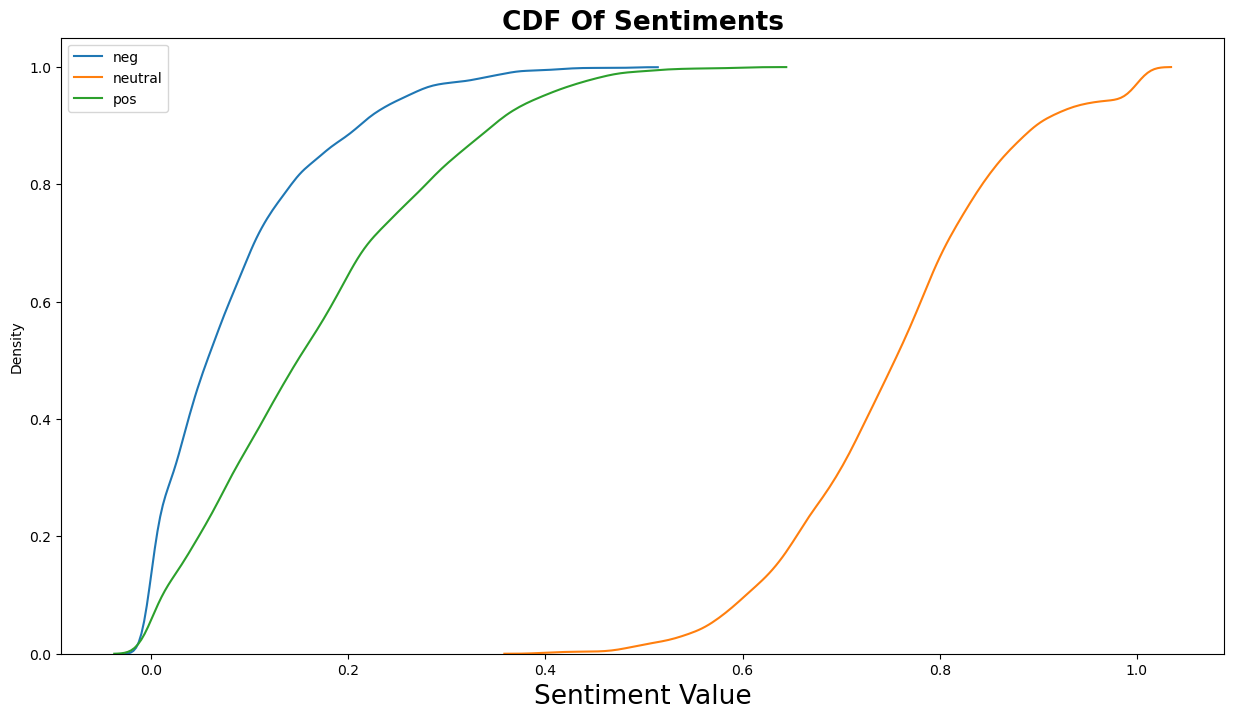

Wall time: 427 ms


In [379]:
%%time
plt.figure(figsize = (15, 8))
plt.title('CDF Of Sentiments',fontsize=19,fontweight='bold')
sns.kdeplot(df3['neg'],bw=0.1,cumulative=True)
sns.kdeplot(df3['neu'],bw=0.1,cumulative=True)
sns.kdeplot(df3['pos'],bw=0.1,cumulative=True)
plt.xlabel('Sentiment Value',fontsize=19)
plt.legend(['neg', 'neutral', 'pos'])
plt.show()

In [380]:
#Comment

In [381]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leena\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [382]:
stop_words = stopwords.words("english")

In [383]:
# applying stopword function on reviewText
df3['review'] = df3['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [384]:
# For WordCloud

stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(df3['review']))
    fig = plt.figure(figsize = (15, 15))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

In [385]:
df3.columns

Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Comfort', 'Value for Money', 'Model Name', 'Sentiment', 'neg', 'neu',
       'pos', 'compound'],
      dtype='object')

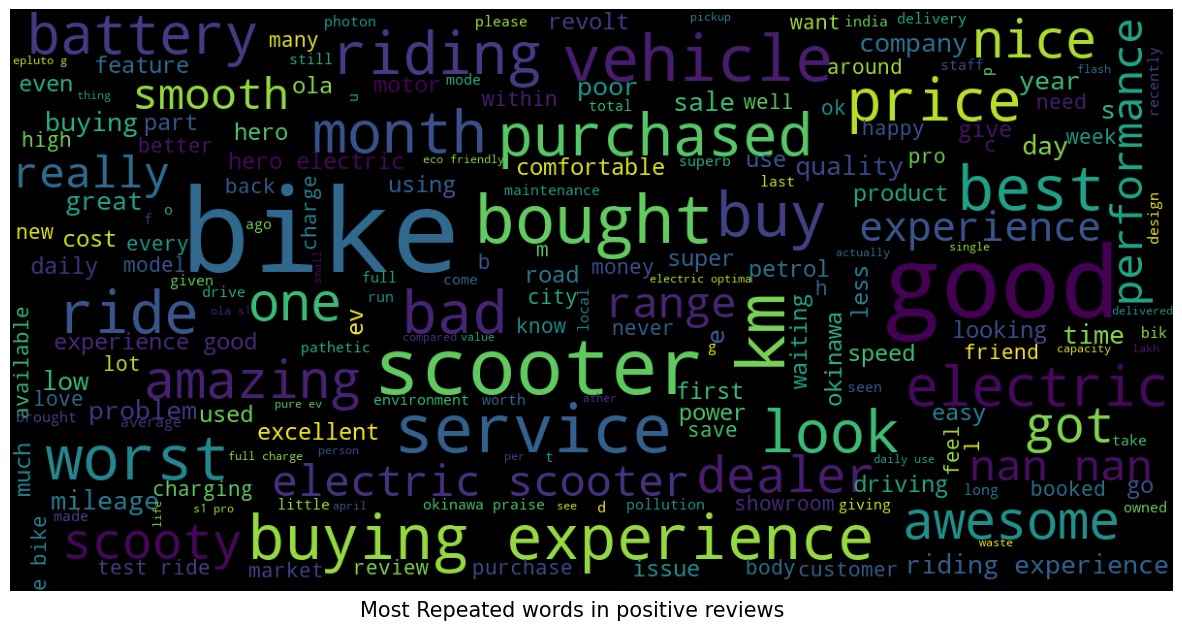

In [386]:
neg=df3[df3["Sentiment"] == "Neg"]["review"]
pos=df3[df3["Sentiment"] == "Pos"]["review"]
neu=df3[df3["Sentiment"] == "Neu"]["review"]

word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")
word_cloud(neu, "Most Repeated words in neutral reviews")


In [387]:
# Getting BIGRAM
def get_top_n_bigram(corpus, n):
    vec = CountVectorizer(ngram_range=(2, 2),stop_words='english').fit(corpus)
    
    # converting a text documents to a matrix of token counts.      
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [388]:
# create a function for bigram plots
def n_gram_plot(data,title,color):                            # Creating n_gram_plot function
    x=[x[0] for x in data]
    y=[x[1] for x in data]
    sns.barplot(y,x,color='{}'.format(color))
    plt.title('{} Reviews Bigrams'.format(title),fontsize=15)
    plt.yticks(rotation=0,fontsize=15)

common_words_good = get_top_n_bigram(pos, 10)                  # Calling get_top_n_bigram for pos columns
common_words_neutral = get_top_n_bigram(neu, 10)               # Calling get_top_n_bigram for neu columns
common_words_bad = get_top_n_bigram(neg, 10)                   # Calling get_top_n_bigram for neg columns

# bigram plot using function above
plt.figure(figsize=(15,10))
# good reviews bigrams
plt.subplot(151)
n_gram_plot(common_words_good,'Good','green')                  # Calling n_gram_plot for pos 
#============================================= 
#neutral reviews bigrams
plt.subplot(153)
n_gram_plot(common_words_neutral,'Neutral','yellow')           # Calling n_gram_plot for pos
#============================================= 
#bad reviews bigrams
plt.subplot(155)
n_gram_plot(common_words_bad,'Bad','red')                      # Calling n_gram_plot for pos
plt.show()




In [389]:
df4=df1.drop(['review','Used it for', 'Owned for','Ridden for'],axis=1)

In [390]:
df4.head

<bound method NDFrame.head of      rating  Visual Appeal  Reliability  Performance  Service Experience  \
0         1            3.0          4.0          NaN                 NaN   
1         1            3.0          1.0          NaN                 1.0   
2         3            4.0          4.0          NaN                 2.0   
3         1            1.0          1.0          NaN                 1.0   
4         1            3.0          4.0          NaN                 1.0   
5         1            5.0          1.0          NaN                 1.0   
6         3            3.0          2.0          NaN                 2.0   
7         1            3.0          1.0          NaN                 1.0   
8         3            3.0          3.0          NaN                 3.0   
9         2            5.0          3.0          NaN                 1.0   
10        5            5.0          5.0          NaN                 5.0   
11        5            4.0          5.0          NaN      

In [391]:
df4.fillna(0)

rating  Visual Appeal  Reliability  Performance  Service Experience  \
0         1            3.0          4.0          0.0                 0.0   
1         1            3.0          1.0          0.0                 1.0   
2         3            4.0          4.0          0.0                 2.0   
3         1            1.0          1.0          0.0                 1.0   
4         1            3.0          4.0          0.0                 1.0   
5         1            5.0          1.0          0.0                 1.0   
6         3            3.0          2.0          0.0                 2.0   
7         1            3.0          1.0          0.0                 1.0   
8         3            3.0          3.0          0.0                 3.0   
9         2            5.0          3.0          0.0                 1.0   
10        5            5.0          5.0          0.0                 5.0   
11        5            4.0          5.0          0.0                 5.0   
12        5            5.0          5.0          0.0                 4.0   
13        5            4.0          4.0          0.0                 4.0   
14        2            2.0          1.0          0.0                 2.0   
15        4            4.0          4.0          0.0                 4.0   
16        1            4.0          2.0          0.0                 1.0   
17        1            3.0          1.0          3.0                 1.0   
18        5            5.0          5.0          5.0                 5.0   
19        5            4.0          4.0          5.0                 3.0   
20        5            5.0          5.0          5.0                 5.0   
21        1            2.0          1.0          1.0                 2.0   
22        3            1.0          5.0          1.0                 1.0   
23        5            4.0          4.0          4.0                 4.0   
24        5            0.0          0.0          0.0                 0.0   
25        5            5.0          5.0          5.0                 5.0   
26        4            0.0          0.0          0.0                 0.0   
27        4            4.0          5.0          4.0                 3.0   
28        1            1.0          1.0          1.0                 1.0   
29        5            0.0          0.0          0.0                 0.0   
30        5            5.0          5.0          5.0                 5.0   
31        5            5.0          5.0          5.0                 5.0   
32        1            1.0          0.0          0.0                 1.0   
33        5            5.0          5.0          5.0                 5.0   
34        5            5.0          4.0          0.0                 0.0   
35        5            5.0          5.0          5.0                 5.0   
36        2            0.0          0.0          0.0                 0.0   
37        5            5.0          5.0          5.0                 5.0   
38        1            0.0          1.0          1.0                 1.0   
39        1            1.0          1.0          1.0                 1.0   
40        4            4.0          3.0          3.0                 4.0   
41        5            5.0          3.0          4.0                 3.0   
42        4            5.0          4.0          4.0                 4.0   
43        4            5.0          3.0          4.0                 3.0   
44        4            5.0          4.0          3.0                 4.0   
45        3            3.0          3.0          3.0                 3.0   
46        5            5.0          0.0          4.0                 4.0   
47        4            4.0          4.0          4.0                 4.0   
48        4            4.0          4.0          4.0                 0.0   
49        4            4.0          4.0          5.0                 4.0   
50        5            5.0          4.0          4.0                 4.0   
51        5            5.0          5.0          5.0 

In [392]:
grouped_df = df4.groupby('Model Name')

In [393]:
grouped_df1 = grouped_df.mean()
a = round(grouped_df1.fillna(0))

In [394]:
dict_columns_type = {'rating': float,
                'Visual Appeal': float,'Reliability': float,'Performance': float,'Service Experience': float,'Extra Features': float,'Comfort': float,'Maintenance cost': float,'Value for Money': float
               }
dfobj = a.astype(dict_columns_type)
dfobj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, Ampere Magnus EX to e-bike Gen Nxt
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rating              39 non-null     float64
 1   Visual Appeal       39 non-null     float64
 2   Reliability         39 non-null     float64
 3   Performance         39 non-null     float64
 4   Service Experience  39 non-null     float64
 5   Extra Features      39 non-null     float64
 6   Comfort             39 non-null     float64
 7   Maintenance cost    39 non-null     float64
 8   Value for Money     39 non-null     float64
dtypes: float64(9)
memory usage: 3.0+ KB


(array([0., 1., 2., 3., 4., 5., 6.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 1500x800 with 0 Axes>

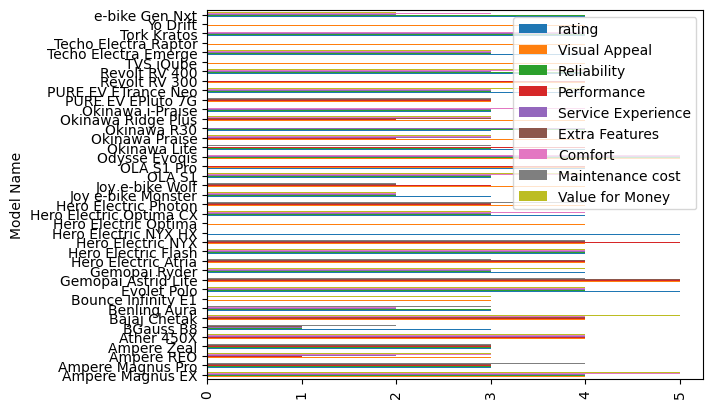

In [395]:
plt.figure(figsize = (15, 8))
a.plot.barh()
plt.xticks(rotation=90)

In [396]:
from scipy import stats
grouped_df2= grouped_df.agg(lambda x: list(stats.mode(x)[0]))
grouped_df2

rating Visual Appeal Reliability Performance  \
Model Name                                                             
Ampere Magnus EX           [5]         [5.0]       [4.0]       [4.0]   
Ampere Magnus Pro          [1]         [5.0]       [5.0]       [nan]   
Ampere REO                 [1]         [4.0]       [3.0]       [nan]   
Ampere Zeal                [1]         [nan]       [nan]       [nan]   
Ather 450X                 [5]         [5.0]       [5.0]       [5.0]   
BGauss B8                  [1]         [nan]       [nan]       [nan]   
Bajaj Chetak               [5]         [5.0]       [5.0]       [nan]   
Benling Aura               [1]         [3.0]       [1.0]       [3.0]   
Bounce Infinity E1         [1]         [5.0]       [1.0]       [nan]   
Evolet Polo                [5]         [5.0]       [4.0]       [nan]   
Gemopai Astrid Lite        [5]         [5.0]       [4.0]       [5.0]   
Gemopai Ryder              [2]         [2.0]       [2.0]       [nan]   
Hero Electric Atria        [4]         [3.0]       [4.0]       [nan]   
Hero Electric Flash        [5]         [5.0]       [5.0]       [nan]   
Hero Electric NYX          [1]         [3.0]       [1.0]       [nan]   
Hero Electric NYX HX       [5]         [nan]       [nan]       [nan]   
Hero Electric Optima       [1]         [5.0]       [1.0]       [nan]   
Hero Electric Optima CX    [5]         [4.0]       [1.0]       [nan]   
Hero Electric Photon       [5]         [4.0]       [4.0]       [nan]   
Joy e-bike Monster         [1]         [1.0]       [1.0]       [nan]   
Joy e-bike Wolf            [1]         [3.0]       [1.0]       [nan]   
OLA S1                     [5]         [nan]       [nan]       [nan]   
OLA S1 Pro                 [5]         [5.0]       [5.0]       [5.0]   
Odysse Evoqis              [5]         [5.0]       [5.0]       [5.0]   
Okinawa Lite               [5]         [5.0]       [5.0]       [nan]   
Okinawa Praise             [1]         [5.0]       [1.0]       [nan]   
Okinawa R30                [4]         [4.0]       [4.0]       [nan]   
Okinawa Ridge Plus         [2]         [5.0]       [3.0]       [nan]   
Okinawa i-Praise           [1]         [5.0]       [4.0]       [5.0]   
PURE EV EPluto 7G          [1]         [5.0]       [1.0]       [5.0]   
PURE EV ETrance Neo        [4]         [5.0]       [3.0]       [nan]   
Revolt RV 300              [5]         [5.0]       [5.0]       [5.0]   
Revolt RV 400              [5]         [5.0]       [5.0]       [5.0]   
TVS iQube                  [1]         [3.0]       [1.0]       [nan]   
Techo Electra Emerge       [5]         [nan]       [1.0]       [nan]   
Techo Electra Raptor       [5]         [5.0]       [1.0]       [nan]   
Tork Kratos                [5]         [5.0]       [4.0]       [4.0]   
Yo Drift                   [5]         [5.0]       [5.0]       [nan]   
e-bike Gen Nxt             [4]         [3.0]       [5.0]       [nan]   

                        Service Experience Extra Features Comfort  \
Model Name                                                          
Ampere Magnus EX                     [4.0]          [4.0]   [nan]   
Ampere Magnus Pro                    [1.0]          [nan]   [nan]   
Ampere REO                           [1.0]          [nan]   [3.0]   
Ampere Zeal                          [1.0]          [nan]   [nan]   
Ather 450X                           [5.0]          [nan]   [5.0]   
BGauss B8                            [nan]          [nan]   [nan]   
Bajaj Chetak                         [5.0]          [nan]   [5.0]   
Benling Aura                         [1.0]          [1.0]   [nan]   
Bounce Infinity E1                   [1.0]          [nan]   [5.0]   
Evolet Polo                          [4.0]          [nan]   [4.0]   
Gemopai Astrid Lite                  [5.0]          [5.0]   [nan]   
Gemopai Ryder                        [2.0]          [nan]   [4.0]   
Hero Electric Atria                  [1.0]          [nan]   [4.0]   
Hero Electric Flash                 